In [481]:
# Cemhan Kaan Özaltan
# 21902695

import numpy as np
import pandas as pd
import seaborn as sns
import random

In [499]:
def sigmoid(x):
    if x > 700:
        return 1 / (1 + 10 ** 200)
    else:
        return 1 / (1 + np.exp(x))
    
def normalize(df, train):
    res = df.copy()
    for i in range(res.shape[1]): # for all columns, apply normalization
            res.iloc[:,i] = (df.iloc[:,i] - train.iloc[:,i].min()) / (train.iloc[:,i].max() - train.iloc[:,i].min())
    return res

def split(df):
    train = df.sample(frac=0.7)
    df = df.drop(train.index)
    test = df.sample(frac=2/3)
    val = df.drop(test.index)
    return train, test, val

def mcle(w, sample):
    return (1 - sigmoid(w[0] + (w[1:] * sample[:-1]).sum()))

class LogisticRegression:
    def __init__(self, w, lr=0.1):
        self.w, self.lr = w, lr
        self.EPOCH_COUNT, self.MINI_BATCH_SIZE = 100, 64 # epoch count 5 for faster testing
    
    def update(self, batch):
        w_sum = 0
        for j in range(batch.shape[0]):
            w_sum += batch[j, -1] - mcle(self.w, batch[j])
        self.w[0] += self.lr * w_sum

        for i in range(batch.shape[1] - 1): # cols - label
            w_sum = 0
            for j in range(batch.shape[0]):
                w_sum += batch[j, i] * (batch[j, -1] - mcle(self.w, batch[j]))
            self.w[i + 1] += self.lr * w_sum
    
    def train_mini_batch(self, train, val):
        acc = []
        print("Current epoch:", end=' ')
        for i in range(self.EPOCH_COUNT):
            print(i + 1, end=' ')
            random_indices = list(range(len(train)))
            random.shuffle(random_indices)
            remaining_samples = len(train)
            batch = []
            for j in random_indices:
                batch.append(train[j])
                remaining_samples -= 1
                if len(batch) == 64 or remaining_samples == 0:
                    self.update(np.array(batch))
                    batch = []
            acc.append(accuracy(val[:,-1], self.predict(val)))
        print()
        return np.array(acc)
    
    def train_sga(self, train, val):
        acc = []
        print("Current epoch:", end=' ')
        for i in range(self.EPOCH_COUNT):
            print(i + 1, end=' ')
            random_indices = list(range(len(train)))
            random.shuffle(random_indices)
            for j in random_indices:
                self.update(np.array([train[j]]))
            acc.append(accuracy(val[:,-1], self.predict(val)))
        print()
        return np.array(acc)
            
    def train_full_batch(self, train, val):
        acc = []
        print("Current epoch:", end=' ')
        for i in range(self.EPOCH_COUNT):
            print(i + 1, end=' ')
            self.update(train)
            acc.append(accuracy(val[:,-1], self.predict(val)))
        print()
        return np.array(acc)
            
    def predict(self, data):
        y_pred = []
        for sample in data:
            y_pred.append(mcle(self.w, sample))
        return np.array([1 if pred > 0.5 else 0 for pred in y_pred])
            
def confusion_matrix(y_true, y_pred):
    cm = np.zeros((2,2), dtype=np.int64)
    correct_count, wrong_count = 0, 0
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred[i])] += 1
    return cm

def accuracy(y_true, y_pred):
    correct_count, wrong_count = 0, 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_count += 1
        else:
            wrong_count += 1
    return correct_count / (correct_count + wrong_count)

In [483]:
df = pd.read_csv('./dataset.csv') # change this path if needed

train, test, val = split(df)
# normalization
'''
train = (train - train.min()) / (train.max() - train.min())
test = (test - train.min()) / (train.max() - train.min())
val = (val - train.min()) / (train.max() - train.min()) 
'''

train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,label
8042,8.548402,2.150243,9.740557,4.889653,3.701897,-1.564548,-0.931591,-1.205758,0.345429,0.911879,0.888432,0.948054,0
36658,8.447328,4.515930,9.971050,1.897440,3.234890,-1.628689,-0.694083,-0.912118,0.330580,0.850601,0.579220,0.399340,0
44512,5.776627,6.963506,6.534336,3.615848,3.520914,-1.862795,-0.912222,-0.745897,0.893139,0.935196,0.879942,0.795723,0
31863,1.525243,9.632561,4.785606,8.793519,4.127534,-1.190451,-1.425149,-1.511933,0.437964,0.463078,0.387212,0.680855,0
33699,9.890867,6.038435,1.252861,1.866876,3.255273,-0.728104,-0.614513,-1.912657,0.611277,0.665127,0.161871,0.440744,1


In [484]:
train, test, val = np.array(normalize(train, train)), np.array(normalize(test, train)), np.array(normalize(val, train))
#train, test, val = np.array(train), np.array(test), np.array(val)

In [485]:
# Question 2.1
sample_count, weight_count = df.shape[0], df.shape[1]

m1 = LogisticRegression(np.random.normal(loc=0.0, scale=1.0, size=13), 0.1)
acc_data1 = m1.train_full_batch(train, val)

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


Accuracy: 0.6215


[Text(0.5, 0, 'Epoch # - 1'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Full-Batch Gradient Ascent Accuracy over Epochs')]

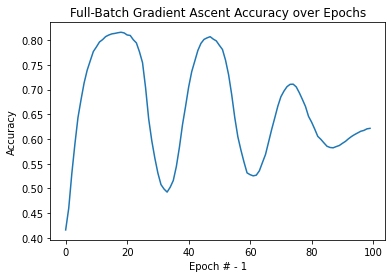

In [486]:
y_pred1 = m1.predict(val)
acc1 = accuracy(val[:,-1], y_pred1)
print("Accuracy for full-batch gradient ascent:", acc1)
sns.lineplot(data=acc_data1).set(xlabel='Epoch # - 1', ylabel='Accuracy', title="Full-Batch Gradient Ascent Accuracy over Epochs")

In [487]:
m2 = LogisticRegression(np.random.normal(loc=0.0, scale=1.0, size=13), 0.1)
acc_data2 = m2.train_sga(train, val)

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


Accuracy: 0.8156666666666667


[Text(0.5, 0, 'Epoch # - 1'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'SGA Accuracy over Epochs')]

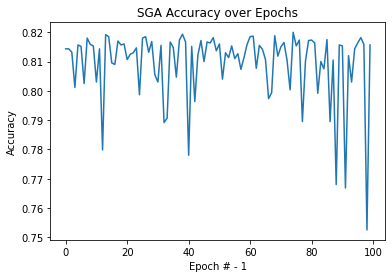

In [488]:
y_pred2 = m2.predict(val)
acc2 = accuracy(val[:,-1], y_pred2)
print("Accuracy for stochastic gradient ascent:", acc2)
sns.lineplot(data=acc_data2).set(xlabel='Epoch # - 1', ylabel='Accuracy', title="SGA Accuracy over Epochs")

In [489]:
m3 = LogisticRegression(np.random.normal(loc=0.0, scale=1.0, size=13), 0.1)
acc_data3 = m3.train_mini_batch(train, val)

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


Accuracy: 0.8048333333333333


[Text(0.5, 0, 'Epoch # - 1'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Mini-Batch Gradient Ascent Accuracy over Epochs')]

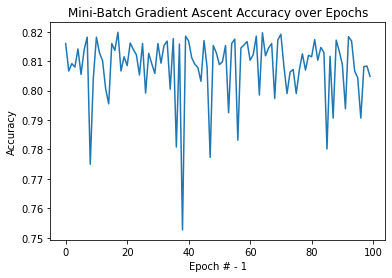

In [490]:
y_pred3 = m3.predict(val)
acc3 = accuracy(val[:,-1], y_pred3)
print("Accuracy for mini-batch gradient ascent:", acc3)
sns.lineplot(data=acc_data3).set(xlabel='Epoch # - 1', ylabel='Accuracy', title="Mini-Batch Gradient Ascent Accuracy over Epochs")

[Text(0.5, 0, 'Epoch # - 1'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Epoch vs. Accuracy for Different Batch Sizes')]

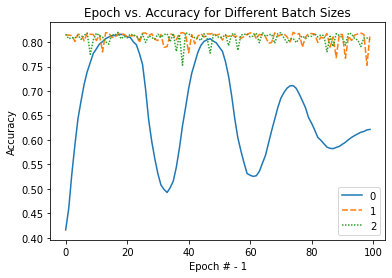

In [494]:
sns.lineplot(data=np.array([acc_data1, acc_data2, acc_data3]).T).set(xlabel='Epoch # - 1', ylabel='Accuracy', title="Epoch vs. Accuracy for Different Batch Sizes")

[Text(0.5, 15.0, 'Predicted label'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 1.0, 'Confusion Matrix (SGA)')]

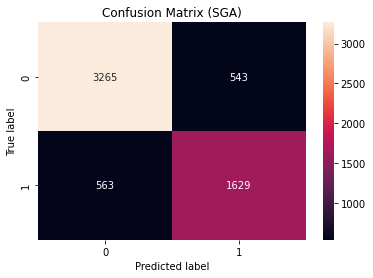

In [505]:
cm = confusion_matrix(val[:,-1], y_pred2) # cm for sga
sns.heatmap(cm, annot=True, fmt='g').set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix (SGA)')

In [506]:
# Question 2.2
m_uniform = LogisticRegression(np.random.uniform(0, 1, 13), 0.1)
m_zeros = LogisticRegression(np.zeros(13), 0.1)

In [507]:
acc_data_uniform = m_uniform.train_sga(train, val)

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


In [508]:
acc_data_zeros = m_zeros.train_sga(train, val)

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


In [509]:
y_pred_uniform = m_uniform.predict(val)
y_pred_zeros = m_zeros.predict(val)
print('Accuracy with gaussian distibution:', accuracy(val[:,-1], y_pred2))
print('Accuracy with uniform distibution:', accuracy(val[:,-1], y_pred_uniform))
print('Accuracy with zero distibution:', accuracy(val[:,-1], y_pred_zeros))

Accuracy with gaussian distibution: 0.8156666666666667
Accuracy with uniform distibution: 0.82
Accuracy with zero distibution: 0.8165


[Text(0.5, 0, 'Epoch # - 1'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Epoch vs. Accuracy for Different Initializations')]

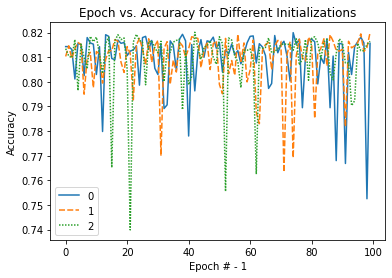

In [510]:
sns.lineplot(data=np.array([acc_data2, acc_data_uniform, acc_data_zeros]).T).set(xlabel='Epoch # - 1', ylabel='Accuracy', title="Epoch vs. Accuracy for Different Initializations")

[Text(0.5, 15.0, 'Predicted label'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 1.0, 'Confusion Matrix (Uniform)')]

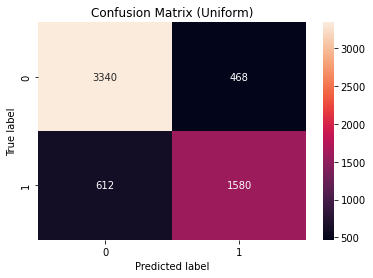

In [511]:
cm = confusion_matrix(val[:,-1], y_pred_uniform) # cm for dists
sns.heatmap(cm, annot=True, fmt='g').set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix (Uniform)')

In [513]:
# Question 2.3
models, accuracy_datas = [], []
for lr in [1, 10 ** -3, 10 ** -4, 10 ** -5]:
    models.append(LogisticRegression(np.random.normal(loc=0.0, scale=1.0, size=13), lr))
    accuracy_datas.append(models[-1].train_sga(train, val))

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 2

In [515]:
y_preds = []
for i in range(len(models)):
    y_preds.append(models[i].predict(val))
for i in range(len(y_preds)):
    print(f"Accuracy for LR with label {i}:", accuracy(val[:,-1], y_preds[i]))

Accuracy for LR with label 0: 0.8021666666666667
Accuracy for LR with label 1: 0.8183333333333334
Accuracy for LR with label 2: 0.817
Accuracy for LR with label 3: 0.7095


[Text(0.5, 15.0, 'Predicted label'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 1.0, 'Confusion Matrix ')]

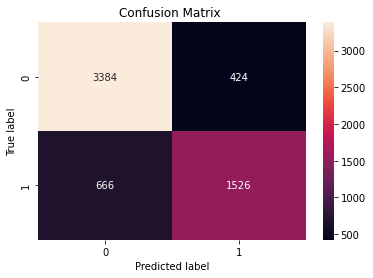

In [516]:
cm = confusion_matrix(val[:,-1], y_preds[1]) # cm for lrs
sns.heatmap(cm, annot=True, fmt='g').set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix')

[Text(0.5, 0, 'Epoch # - 1'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Epoch vs. Accuracy for Different Learning Rates')]

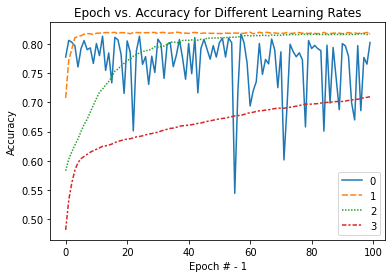

In [517]:
# Labels: 0 = 1, 1 = 10^-3, 2 = 10^-4, 3 = 10^-5 
sns.lineplot(data=np.array(accuracy_datas).T).set(xlabel='Epoch # - 1', ylabel='Accuracy', title="Epoch vs. Accuracy for Different Learning Rates")

In [519]:
# Question 2.4
m_best = LogisticRegression(np.random.uniform(0, 1, 13), 10 ** -3)
acc_data_best = m_best.train_sga(train, val)

Current epoch: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


In [520]:
y_pred_best = m_best.predict(test)

[Text(0.5, 15.0, 'Predicted label'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 1.0, 'Confusion Matrix for the Best Model')]

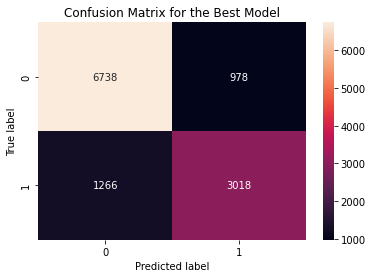

In [521]:
cm = confusion_matrix(test[:,-1], y_pred_best) # cm for lrs
sns.heatmap(cm, annot=True, fmt='g').set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix for the Best Model')

In [525]:
tp, tn, fp, fn = 0, 0, 0, 0
for i in range(len(y_pred_best)):
    if y_pred_best[i] == test[:,-1][i] and y_pred_best[i] == 0:
        tp += 1
    elif y_pred_best[i] == test[:,-1][i] and y_pred_best[i] == 1:
        tn += 1
    elif y_pred_best[i] != test[:,-1][i] and y_pred_best[i] == 0:
        fp += 1
    else:
        fn += 1
precision, recall = tp / (tp + fp), tp / (tp + fn)
print('Accuracy:', accuracy(test[:,-1], y_pred_best))
print("Precision", precision)
print("Recall", recall)
print("F1", ((1 + 1 ** 2) * precision * recall) / ((1 ** 2) * precision + recall))
print("F2", ((1 + 2 ** 2) * precision * recall) / ((2 ** 2) * precision + recall))
print("F0.5", ((1 + 0.5 ** 2) * precision * recall) / ((0.5 ** 2) * precision + recall))

Accuracy: 0.813
Precision 0.8418290854572713
Recall 0.8732503888024883
F1 0.8572519083969464
F2 0.8667798703303489
F0.5 0.8479311386288131
